In [1]:
#1. 미선러닝 기본 개념과 데이터 준비

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/auto-mpg.csv", header=None)
df.columns = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model year", "origin", "name"
]
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
#2. 데이터 전처리와 탐색적 분석
    #결측치, 이상치 처리 / 기본 통계량 분석

df.isna().sum() #결측 x

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df['horsepower'].unique() #dtype=object, ? > na

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [5]:
df['horsepower']=df['horsepower'].replace('?', np.nan)
df['horsepower']=df['horsepower'].astype('float')

In [6]:
#결측치 대치
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())
print(df['horsepower'].isnull().sum())

0


In [8]:
df.duplicated().sum()

0

In [7]:
#기본 통계량
df.describe()

#큰 특이값은 없다

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
#3. 상관관게 분석과 시각화
    #상관관계 분석, 히트맵, 산점도
corr=df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


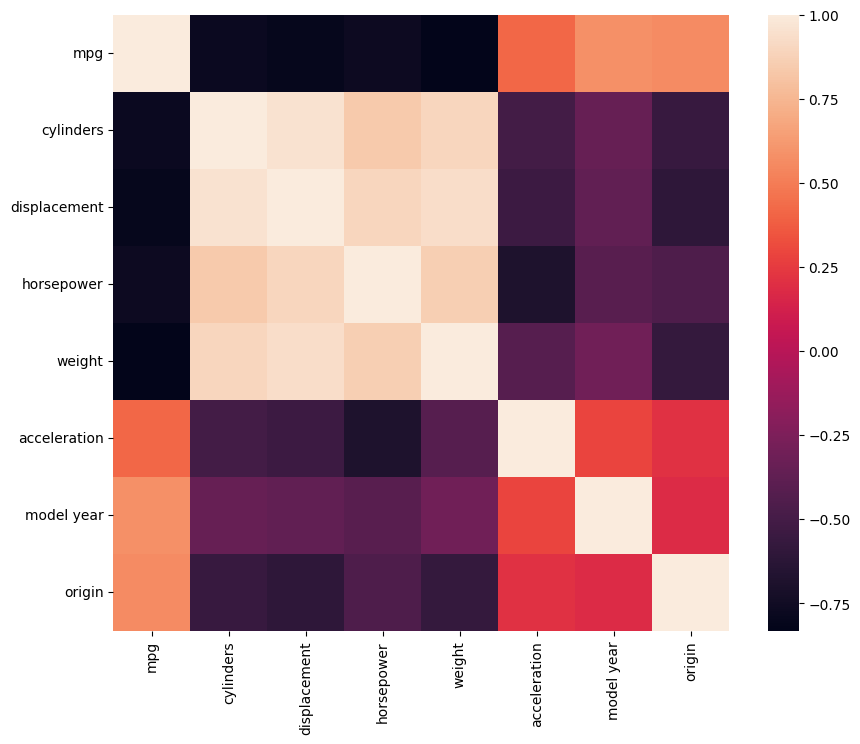

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, square=True)
plt.show()

C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

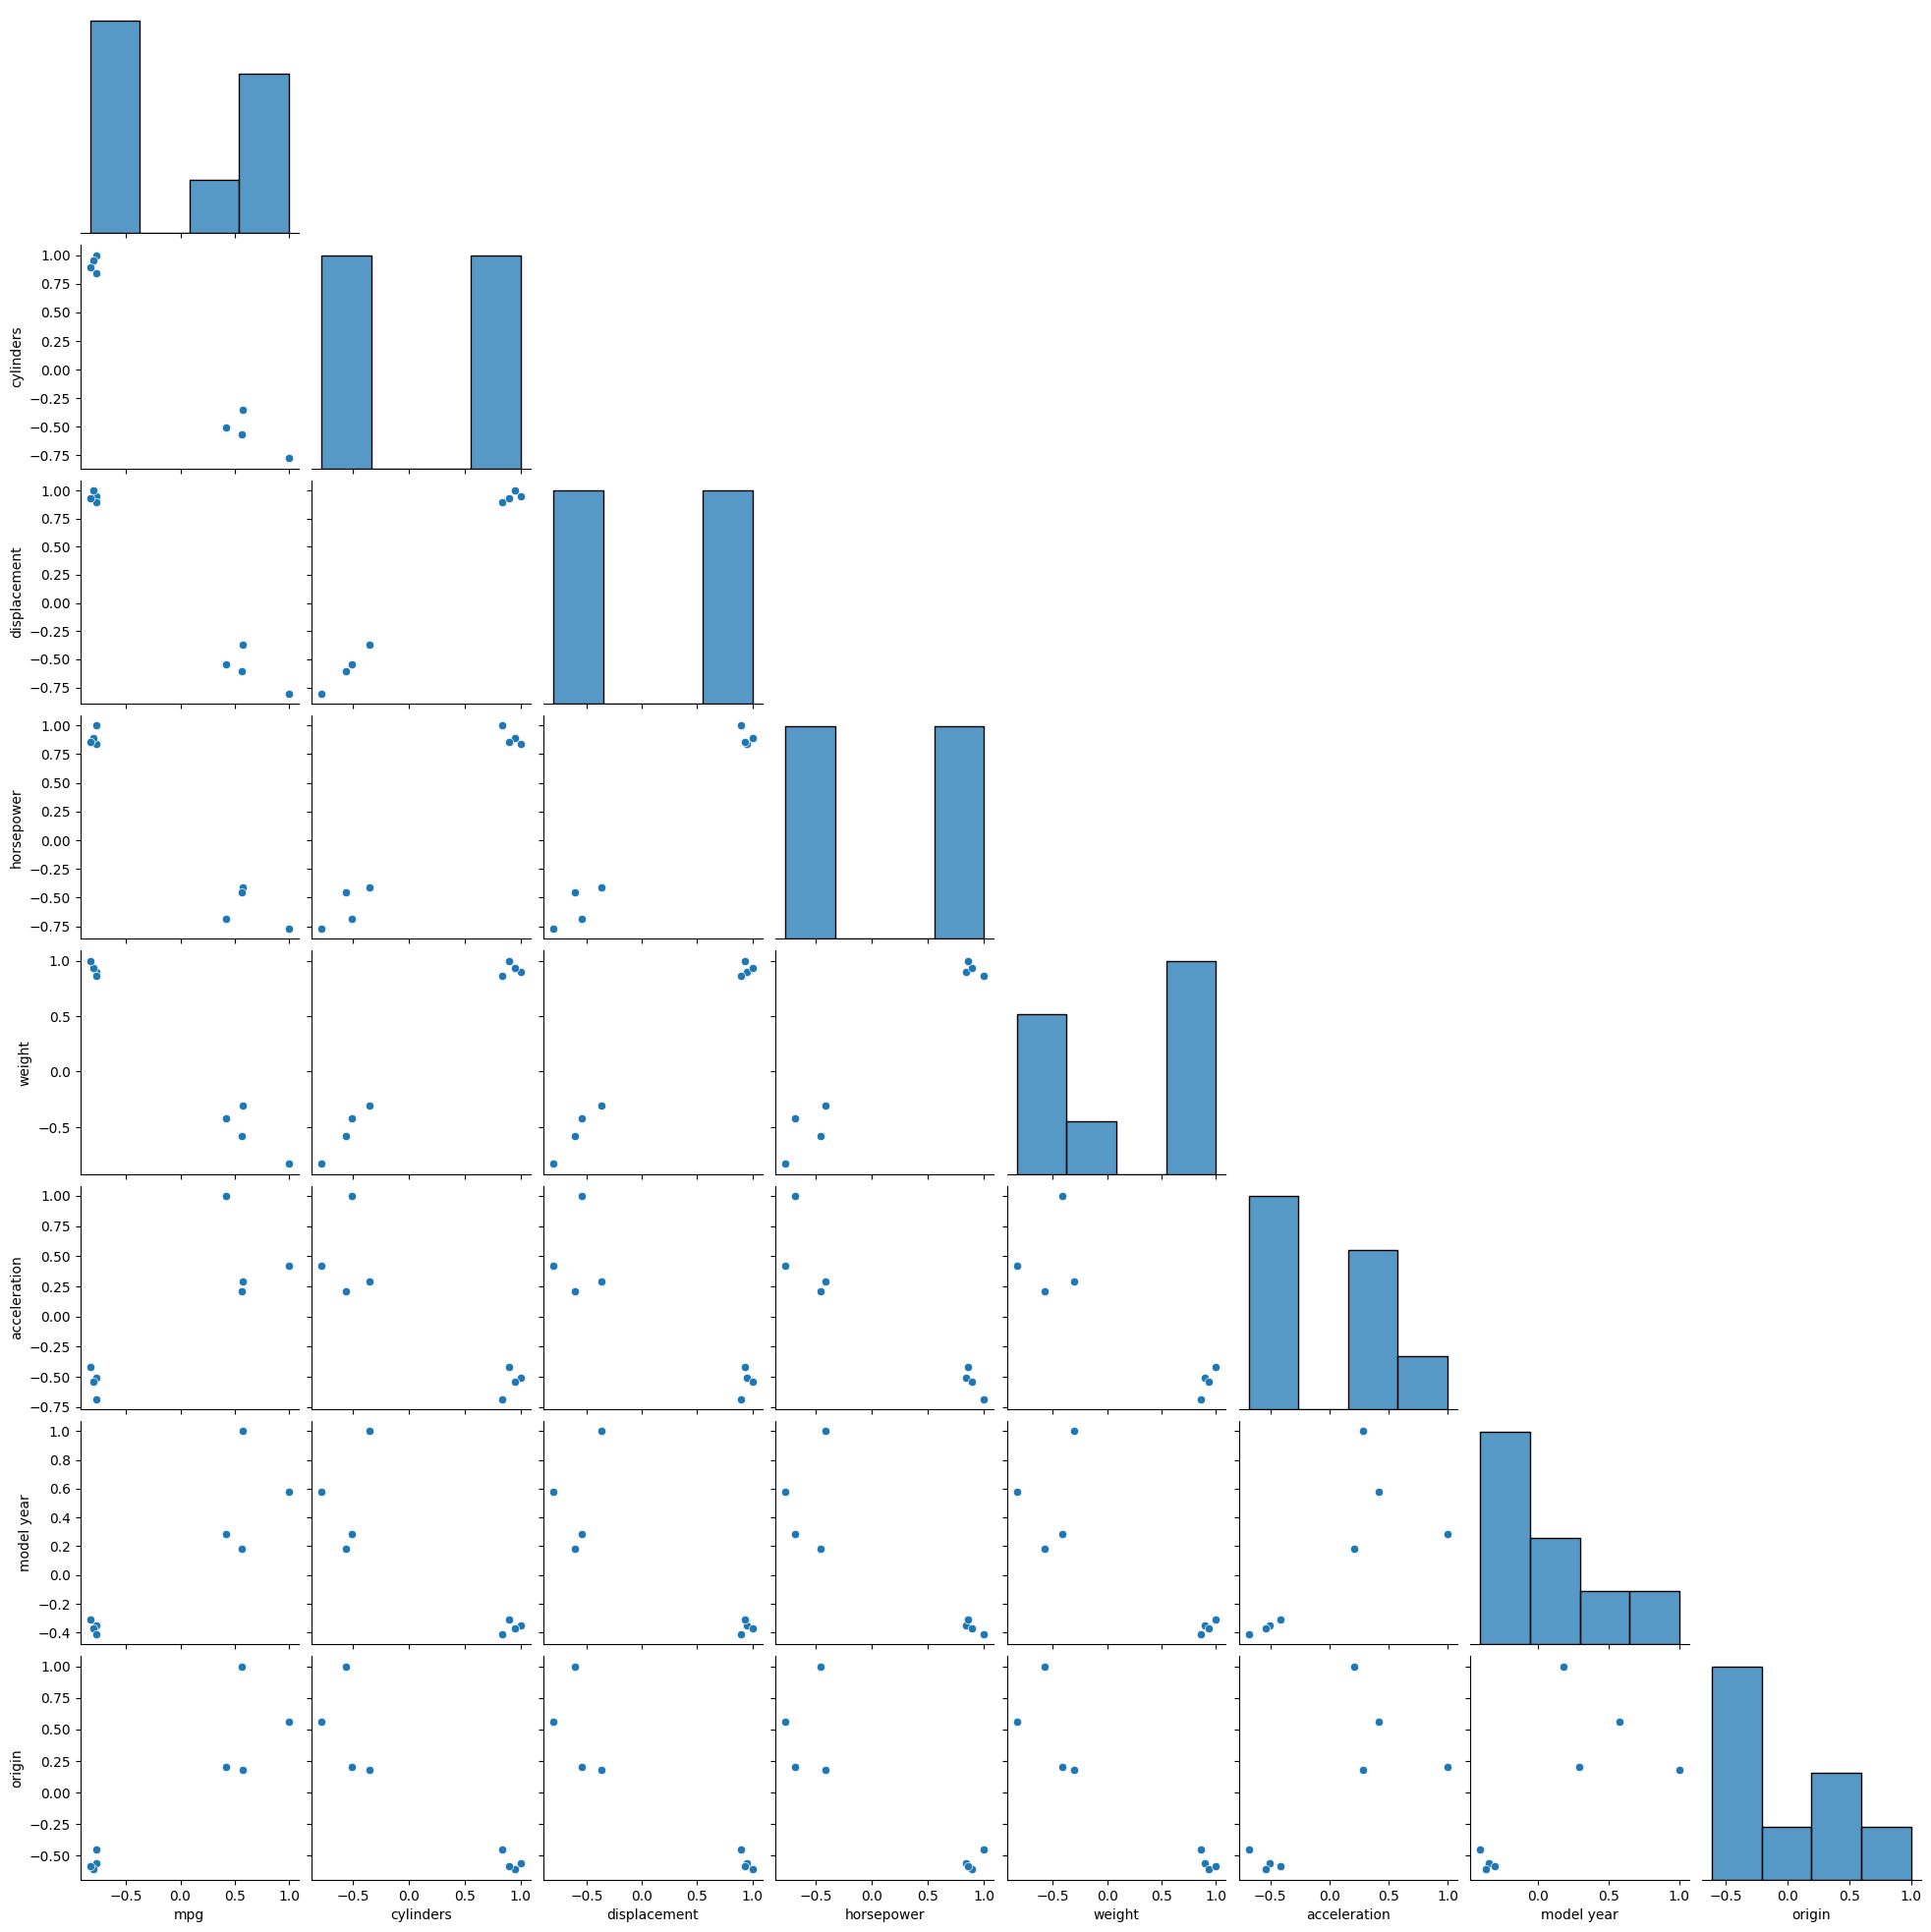

In [15]:
sns.pairplot(corr, corner=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
#4. 단순 선형 회귀분석
    #독립변수: weight, 종속변수: mpg
X=df[['weight']]
y=df['mpg']

X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                 test_size=0.3,
                                                 random_state=10)

model1=LinearRegression()
model1.fit(X_train, y_train)

y_pred=model1.predict(X_test) #예측값

r2_1=model1.score(X_test, y_test)
mse1=mean_squared_error(y_test, y_pred)
mae1=mean_absolute_error(y_test, y_pred)

print('model 1 mpg = ', model1.coef_, '[weight] +', model1.intercept_)
print('model 1 R^2: ', r2_1)
print('model 1 mse: ', mse1)
print('model 1 mae: ', mae1)


model 1 mpg =  [-0.0076554] [weight] + 46.60365052224634
model 1 R^2:  0.689363809315209
model 1 mse:  17.898336128759958
model 1 mae:  3.365671161415443


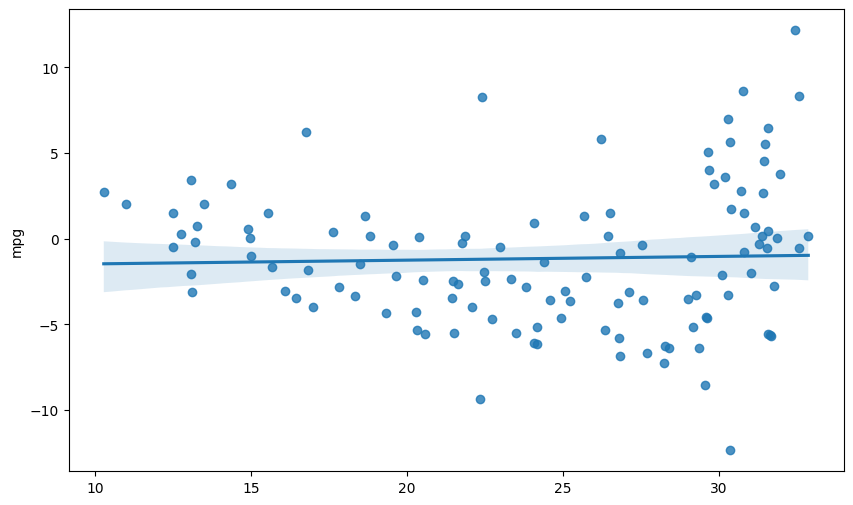

C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


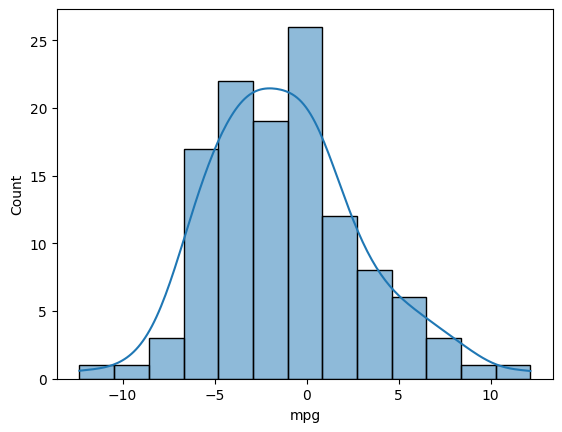

In [23]:
#5. 모델 예측과 잔차 분석
    #예측 수행, 잔차 분석을 통해 모델 성능 평가
#잔차: 실제값 - 예측값

case1=y_test-y_pred
plt.figure(figsize=(10, 6))
sns.regplot(x=y_pred, y=case1)
plt.show()

sns.histplot(case1, kde=True)
plt.show()

In [24]:
#6. 다항 회귀분석
    #2차항을 포함한 다항 회귀모델 구축, 성능 비교
from sklearn.preprocessing import PolynomialFeatures #다항식 변환

poly=PolynomialFeatures(degree=2) #2차항 적용
X_train_poly=poly.fit_transform(X_train) #X_train을 2차항으로 변형

model2=LinearRegression()
model2.fit(X_train_poly, y_train)

X_test_poly=poly.transform(X_test) #X_test 데이터를 2차항으로 변형
y_pred_2=model2.predict(X_test_poly) #예측값

r2_2 = r2_score(y_test, y_pred_2)
mse2=mean_squared_error(y_test, y_pred_2)
mae2=mean_absolute_error(y_test, y_pred_2)

# model2.coef: [절편항계수, weight계수, weight^2계수] 
print(f"model 2 회귀식: mpg = {model2.coef_[2]:.4f} * [weight^2] + {model2.coef_[1]:.4f} * [weight] + {model2.intercept_:.4f}")
print('model 2 R^2: ', r2_2)
print('model 2 mse: ', mse2)
print('model 2 mae: ', mae2)



model 2 회귀식: mpg = 0.0000 * [weight^2] + -0.0169 * [weight] + 60.4059
model 2 R^2:  0.7255470154177007
model 2 mse:  15.813520500513508
model 2 mae:  3.1405650734449524


In [26]:
#7. 다중 회귀분석
    #독립변수= cylinders, horsepower, weight
X=df[['cylinders', 'horsepower', 'weight']]
y=df['mpg']

X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 test_size=0.3,
                                                 random_state=10)

model3=LinearRegression()
model3.fit(X_train, y_train)

y_pred_3=model3.predict(X_test) 

r2_3 = r2_score(y_test, y_pred_3)
mse3=mean_squared_error(y_test, y_pred_3)
mae3=mean_absolute_error(y_test, y_pred_3)

print(f"model 3 회귀식: mpg = {model3.coef_[0]:.4f} * [cylinders] + {model3.coef_[1]:.4f} * [horsepower] + {model3.coef_[2]:.4f} * [weight] + {model3.intercept_:.4f}")
print('model 3 R^2: ', r2_3)
print('model 3 mse: ', mse3)
print('model 3 mae: ', mae3)

model 3 회귀식: mpg = -0.3821 * [cylinders] + -0.0471 * [horsepower] + -0.0051 * [weight] + 46.0995
model 3 R^2:  0.6895968946794342
model 3 mse:  17.88490614113874
model 3 mae:  3.32820214409861


In [31]:
#8. 과적합 분석과 최적 모델 선택
    #다항식 비교, 과적합 분석, 최적 모델 선택
    
comparison_df = pd.DataFrame({
    'R²': [r2_1, r2_2, r2_3],
    'MSE': [mse1, mse2, mse3],
    'MAE': [mae1, mae2, mae3]
}, index=['단순 선형 회귀', '다항 회귀', '다중 선형 회귀'])

print(comparison_df.round(4))


#다항회귀 > 설명 계수 가장 높음 + mes, mae가 가장 낮으므로 모델을 가장 잘 설명함
    #mpg의 분산을 72.6%로 설명함
    #모델 예측값이 실제 정답값과의 평균적인 오차 거리가 가장 작다
    #mpg, weight가 직선 관계가 아닌 곡선 형태의 비선형 관계일 것임
    
    #변수가 추가됐음에도 다중 선형 회귀와 성능이 비슷하다
        #추가된 변수가 기존 weight와 겹치는 부분이 존재하기 떄문 > 다중공선성 문제가 될 수 있다

              R²      MSE     MAE
단순 선형 회귀  0.6894  17.8983  3.3657
다항 회귀     0.7255  15.8135  3.1406
다중 선형 회귀  0.6896  17.8849  3.3282
